
---

# Text Classification Using Machine Learning and LSTM Models

---

### **Introduction**
This project implements a robust text classification pipeline using both traditional machine learning models and deep learning with Long Short-Term Memory (LSTM) networks. It processes a dataset of newsgroup articles and classifies them into predefined categories. By combining data preprocessing, feature engineering, and advanced model architectures, this project demonstrates versatility in solving text classification problems.

---

### **Purpose and Objectives**
The main goals of this project are:
1. To showcase expertise in traditional machine learning and modern deep learning approaches for natural language processing (NLP) tasks.
2. To build a comparative framework for evaluating different classifiers based on performance metrics.
3. To apply real-world data preprocessing techniques, feature extraction, and model evaluation methods.

---

### **Key Components and Explanation**

#### **1. Dataset**
- **Source:** The [20 Newsgroups Dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) from Scikit-learn.
- **Categories Used:** Articles related to `sci.med`, `comp.graphics`, and `rec.sport.baseball`.
- **Subset Used:** Texts with headers, footers, and quotes removed for cleaner input.

#### **2. Data Preprocessing**
- Texts are cleaned and tokenized using NLTK.
- Key cleaning steps:
  - Conversion to lowercase.
  - Removal of URLs, mentions, hashtags, and emojis.
  - Removal of stopwords and punctuation.
  - Tokenization to extract meaningful words.
- Stopwords are downloaded using NLTK for comprehensive filtering.

#### **3. Feature Extraction**
- **Machine Learning Approach:** 
  - TF-IDF (Term Frequency-Inverse Document Frequency) vectorization converts textual data into numerical features with a maximum of 5000 features.
- **Deep Learning Approach:** 
  - Texts are tokenized and padded into sequences for use with the LSTM model.

#### **4. Models**
##### **Machine Learning Models**
1. **Logistic Regression:** A simple and effective linear classifier.
2. **Naive Bayes:** A probabilistic classifier well-suited for text data.
3. **Support Vector Machine (SVM):** A robust algorithm for high-dimensional feature spaces.
4. **Decision Tree:** A non-linear model for interpretability.

##### **Deep Learning Model**
- **LSTM Network:**
  - Embedding layer to convert words into dense vector representations.
  - LSTM layer to capture sequential dependencies in text.
  - Dense layers with Dropout to prevent overfitting.
  - Output layer with softmax activation for multi-class classification.

#### **5. Model Evaluation**
- Performance metrics include:
  - **Accuracy**: Measures the proportion of correctly classified instances.
  - **Classification Report**: Includes precision, recall, and F1-score for each class.
  - **Confusion Matrix**: Visualizes true vs. predicted labels.
- Machine learning models are compared with Logistic Regression selected for detailed analysis.
- LSTM results are plotted with accuracy and loss trends during training.

---

### **How It Works**

#### **Machine Learning Workflow**
1. Preprocess the dataset using text cleaning and tokenization.
2. Extract features using TF-IDF vectorization.
3. Train classifiers on the training data.
4. Evaluate models on the test data using performance metrics.
5. Visualize results with a confusion matrix.

#### **Deep Learning Workflow**
1. Encode labels as categorical data.
2. Tokenize and pad text data for uniform sequence lengths.
3. Build and compile an LSTM model with embedding, LSTM, and dense layers.
4. Train the model and evaluate on the test set.
5. Visualize training performance and confusion matrix.

---


---

### **Applications**
This project has a variety of applications, such as:
- Categorizing customer support tickets for quick routing.
- News article classification for personalized content delivery.
- Sentiment analysis for business insights.
- Automatic tagging of blog posts or documents.

---

### **Code Implementation**

#### **Machine Learning Code**


In [1]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Step 1: Load the Dataset
data = fetch_20newsgroups(subset='all', categories=['sci.med', 'comp.graphics', 'rec.sport.baseball'],
                          remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)


In [4]:
# Step 2: Data Preprocessing
# Cleaning Functions
def clean_text(text):
    # Lowercasing all letters
    text = text.lower()
    # Removing links
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # Removing mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Replacing emojis with a placeholder
    text = re.sub(r'[\U00010000-\U0010ffff]', 'emoji', text)
    # Removing consecutive letters
    text = re.sub(r'(\w)\1+', r'\1', text)
    # Removing punctuations and non-alphanumeric characters
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Joining tokens back into a string
    text = ' '.join(tokens)
    return text


In [5]:
# Apply cleaning to the dataset
texts = [clean_text(doc) for doc in data.data]
labels = data.target


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)


In [7]:
# Step 3: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
# Step 4: Train and Evaluate Classifiers
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)
lr_pred = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression:\n")
print(classification_report(y_test, lr_pred, target_names=data.target_names))
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.2f}")



Logistic Regression:

                    precision    recall  f1-score   support

     comp.graphics       0.94      0.92      0.93       205
rec.sport.baseball       0.90      0.94      0.92       187
           sci.med       0.92      0.91      0.91       200

          accuracy                           0.92       592
         macro avg       0.92      0.92      0.92       592
      weighted avg       0.92      0.92      0.92       592

Accuracy: 0.92


In [9]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_pred = nb_classifier.predict(X_test_tfidf)
print("\nNaive Bayes:\n")
print(classification_report(y_test, nb_pred, target_names=data.target_names))
print(f"Accuracy: {accuracy_score(y_test, nb_pred):.2f}")



Naive Bayes:

                    precision    recall  f1-score   support

     comp.graphics       0.93      0.94      0.94       205
rec.sport.baseball       0.90      0.95      0.92       187
           sci.med       0.95      0.90      0.93       200

          accuracy                           0.93       592
         macro avg       0.93      0.93      0.93       592
      weighted avg       0.93      0.93      0.93       592

Accuracy: 0.93


In [10]:
# Support Vector Machine
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)
svm_pred = svm_classifier.predict(X_test_tfidf)
print("\nSupport Vector Machine:\n")
print(classification_report(y_test, svm_pred, target_names=data.target_names))
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.2f}")



Support Vector Machine:

                    precision    recall  f1-score   support

     comp.graphics       0.94      0.94      0.94       205
rec.sport.baseball       0.90      0.94      0.92       187
           sci.med       0.94      0.90      0.92       200

          accuracy                           0.93       592
         macro avg       0.93      0.93      0.93       592
      weighted avg       0.93      0.93      0.93       592

Accuracy: 0.93


In [11]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)
dt_pred = dt_classifier.predict(X_test_tfidf)
print("\nDecision Tree:\n")
print(classification_report(y_test, dt_pred, target_names=data.target_names))
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.2f}")



Decision Tree:

                    precision    recall  f1-score   support

     comp.graphics       0.78      0.75      0.77       205
rec.sport.baseball       0.70      0.83      0.76       187
           sci.med       0.78      0.68      0.73       200

          accuracy                           0.75       592
         macro avg       0.75      0.75      0.75       592
      weighted avg       0.76      0.75      0.75       592

Accuracy: 0.75


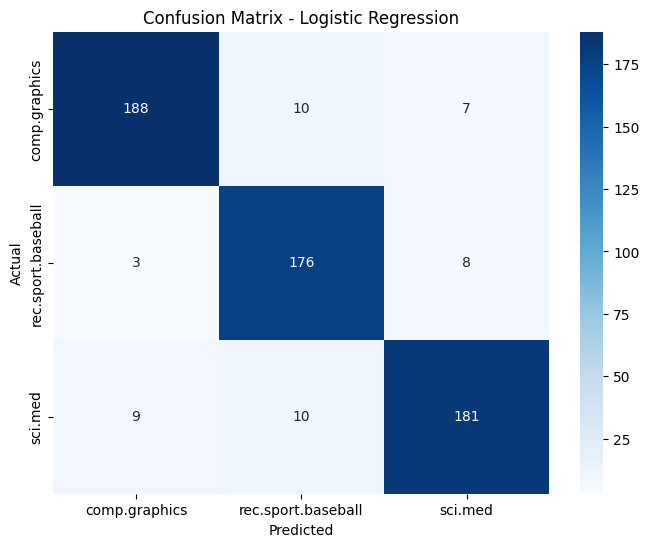

In [12]:
# Step 5: Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### **Deep Learning Code**


In [21]:
# Step 3: Encode Labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)


In [22]:
# Step 4: Tokenization and Padding
max_words = 10000  # Maximum number of unique words in the tokenizer
max_len = 200      # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

X_sequences = tokenizer.texts_to_sequences(texts)
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, labels_categorical, test_size=0.2, random_state=42)


In [23]:
# Step 5: Define the LSTM Model
embedding_dim = 128

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.3494 - loss: 1.0986 - val_accuracy: 0.3615 - val_loss: 1.0954
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.3632 - loss: 1.0977 - val_accuracy: 0.2896 - val_loss: 1.1006
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.3548 - loss: 1.1010 - val_accuracy: 0.2896 - val_loss: 1.1004
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.3630 - loss: 1.0974 - val_accuracy: 0.3890 - val_loss: 1.0957
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - accuracy: 0.4048 - loss: 1.0949 - val_accuracy: 0.3023 - val_loss: 1.0934
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.3750 - loss: 1.0762 - val_accuracy: 0.3911 - val_loss: 1.0727
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.3688 - loss: 1.0516 - val_accuracy: 0.3235 - val_loss: 1.0422
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.4017 - loss: 1.0621 - val_accu

In [26]:
# Step 7: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.36


In [27]:
# Step 8: Make Predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


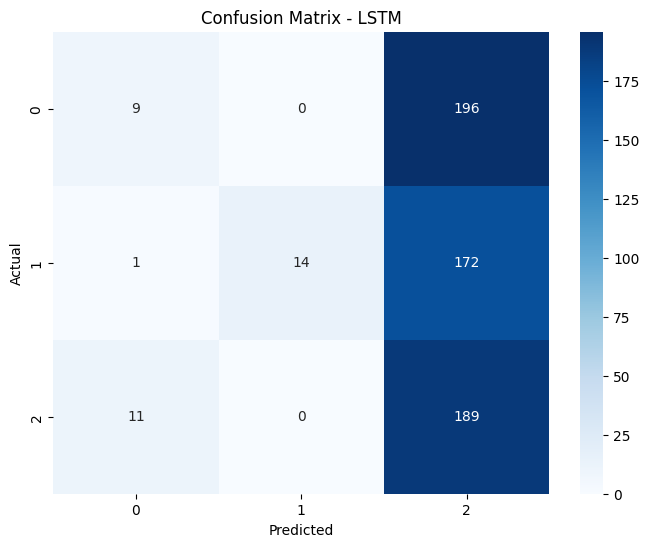


Classification Report:

              precision    recall  f1-score   support

           0       0.43      0.04      0.08       205
           1       1.00      0.07      0.14       187
           2       0.34      0.94      0.50       200

    accuracy                           0.36       592
   macro avg       0.59      0.35      0.24       592
weighted avg       0.58      0.36      0.24       592



In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure classes are converted to strings if they are numeric
class_labels = [str(label) for label in label_encoder.classes_]

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


---

### **Future Enhancements**
1. **Hybrid Models:** Combine machine learning and deep learning models for improved performance.
2. **Dataset Expansion:** Incorporate more categories for a broader classification scope.
3. **Interactive Interface:** Develop a web or desktop application for real-time text classification.
4. **Hyperparameter Tuning:** Experiment with model architectures, embedding dimensions, and other hyperparameters to optimize accuracy.

---

### **Conclusion**
This project effectively demonstrates expertise in implementing both traditional and modern approaches to text classification. It showcases proficiency in data preprocessing, model training, evaluation, and visualization. The comparison between machine learning and deep learning models provides valuable insights into their relative strengths and use cases.

---
